# Diabetes pred
- investigate data (read in csv with PANDAS)
    + plot data with MATPLOTLIB

- stratified train val split with SCIKITLEARN

- train with XGBOOST (no param tuning)

# Step 1 - imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier

# Step 2 - Data Read in and Analysis

In [2]:
# read in data
train_df = pd.read_csv("./train.csv")

print(train_df.head())

   id  age  alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0   0   31                             1                                  45   
1   1   50                             2                                  73   
2   2   32                             3                                 158   
3   3   54                             3                                  77   
4   4   54                             1                                  55   

   diet_score  sleep_hours_per_day  screen_time_hours_per_day   bmi  \
0         7.7                  6.8                        6.1  33.4   
1         5.7                  6.5                        5.8  23.8   
2         8.5                  7.4                        9.1  24.1   
3         4.6                  7.0                        9.2  26.6   
4         5.7                  6.2                        5.1  28.8   

   waist_to_hip_ratio  systolic_bp  ...  gender  ethnicity  education_level  \
0            

In [3]:
# analyze the data

# what are types of each data?
# for each col in train_df get data type
print(train_df.dtypes)

id                                      int64
age                                     int64
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                         int64
ldl_cholesterol                         int64
triglycerides                           int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
smoking_status                         object
employment_status                 

In [4]:

#gender, ethnicity, education_level, income_level, smoking_status, employment_status 
    # non numeric
# id not useful, diagnosed_diabetes is answer

# for non numeric cols, how should we convert (one hot, ordinal, etc)?
# gender -> 1 hot (0, 1)
# ethnicity -> 1 hot 
# education level -> ordinal 
# income level -> ordinal
# smoking status -> ordinal
# employment -> 1 hot

# for each non numeric col, 
#   print all unique values, 
#   decide on mapping 
#   and apply in place
#print(train_df['gender'].unique())
gender_map = {'Female': 0, 'Male': 1, 'Other': 2}

train_df['gender_num'] = train_df['gender'].map(gender_map)
#print(train_df['gender_num'])


# now do the same for all other cols
#print(train_df['ethnicity'].unique())
ethnicity_map = {'Hispanic': 0, 'White': 1, 'Asian': 2, 'Black': 3, 'Other': 4}

train_df['ethnicity_num'] = train_df['ethnicity'].map(ethnicity_map)
#print(train_df['ethnicity_num'])

#print(train_df['education_level'].unique())
education_map = {'No formal': 0, 'Highschool': 1, 'Graduate': 2, 'Postgraduate': 3}

train_df['education_num'] = train_df['education_level'].map(education_map)
#print(train_df['education_num'])

#print(train_df['income_level'].unique())
income_map = {'Low': 0, 'Lower-Middle': 1, 'Middle': 2, 'Upper-Middle': 3, 'High': 4}

train_df['income_num'] = train_df['income_level'].map(income_map)
#print(train_df['income_num'])



#print(train_df['smoking_status'].unique())
smoking_map = {'Never': 0, 'Former': 1, 'Current': 2}

train_df['smoking_num'] = train_df['smoking_status'].map(smoking_map)
#print(train_df['smoking_num'])


#print(train_df['employment_status'].unique())
employment_map = {'Unemployed': 0, 'Retired': 1, 'Employed': 2, 'Student': 3}

train_df['employment_num'] = train_df['employment_status'].map(employment_map)
#print(train_df['employment_num'])



# drop all of the cols and print the new types
train_df = train_df.drop(['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status'], axis=1)
print(train_df.dtypes)


id                                      int64
age                                     int64
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                         int64
ldl_cholesterol                         int64
triglycerides                           int64
family_history_diabetes                 int64
hypertension_history                    int64
cardiovascular_history                  int64
diagnosed_diabetes                    float64
gender_num                              int64
ethnicity_num                     

In [5]:

# what pct null in each row?
print(train_df.isnull().sum() / len(train_df))

# how to handle nulls?


id                                    0.0
age                                   0.0
alcohol_consumption_per_week          0.0
physical_activity_minutes_per_week    0.0
diet_score                            0.0
sleep_hours_per_day                   0.0
screen_time_hours_per_day             0.0
bmi                                   0.0
waist_to_hip_ratio                    0.0
systolic_bp                           0.0
diastolic_bp                          0.0
heart_rate                            0.0
cholesterol_total                     0.0
hdl_cholesterol                       0.0
ldl_cholesterol                       0.0
triglycerides                         0.0
family_history_diabetes               0.0
hypertension_history                  0.0
cardiovascular_history                0.0
diagnosed_diabetes                    0.0
gender_num                            0.0
ethnicity_num                         0.0
education_num                         0.0
income_num                        

In [6]:
# how balanced is data?
print(train_df['diagnosed_diabetes'].value_counts(normalize=True)) # get pcts

# how to handle data imbalance?
# not super bad but will use these pcts in xgboost

diagnosed_diabetes
1.0    0.623296
0.0    0.376704
Name: proportion, dtype: float64


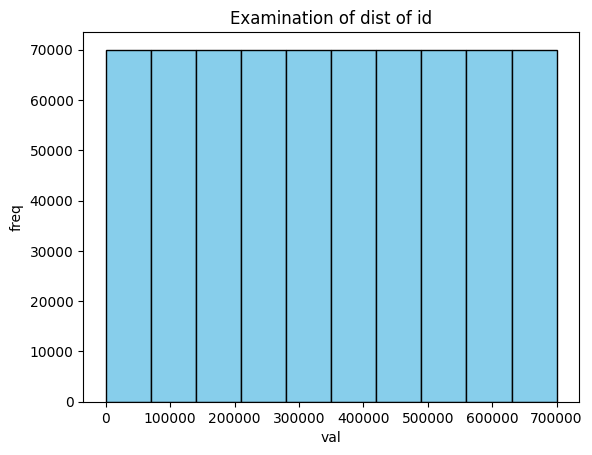

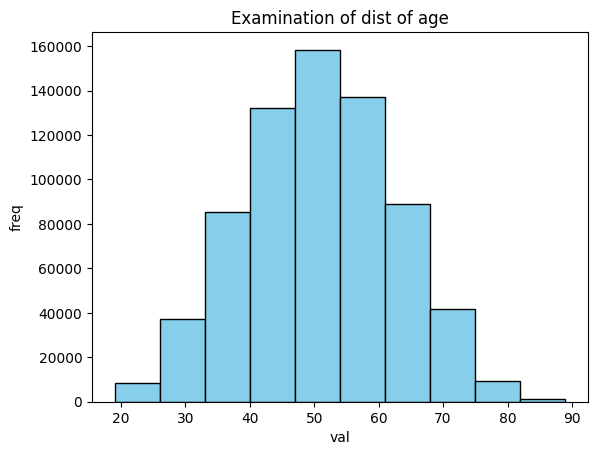

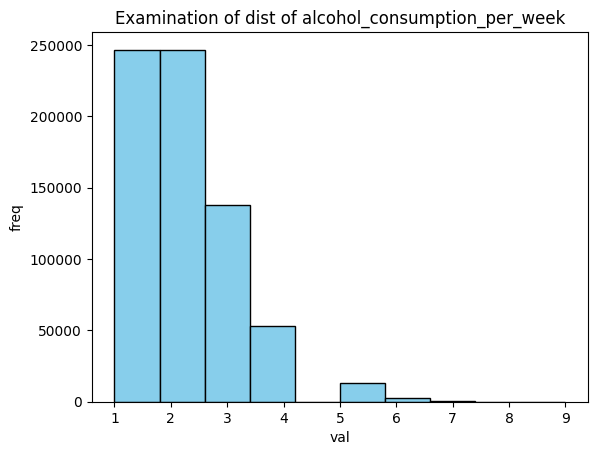

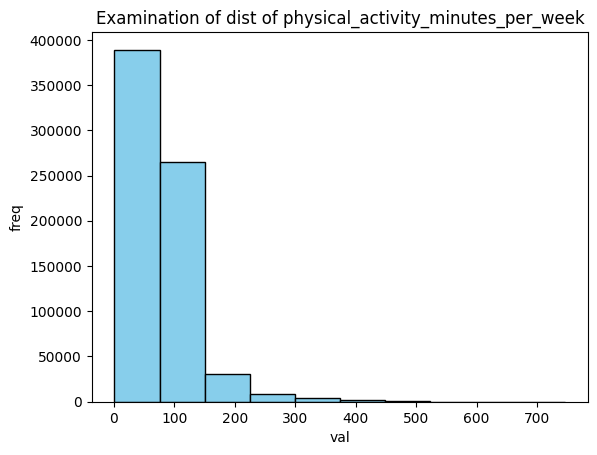

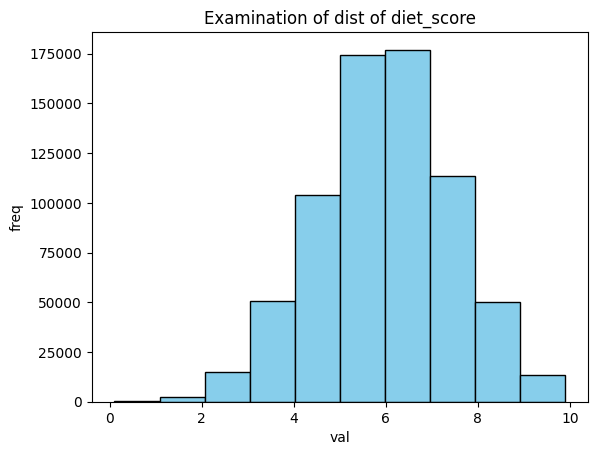

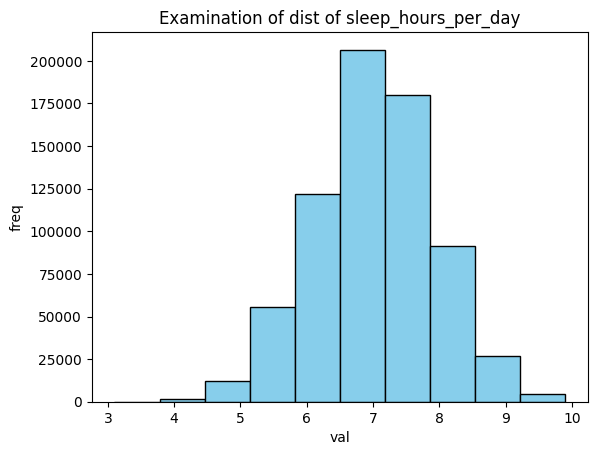

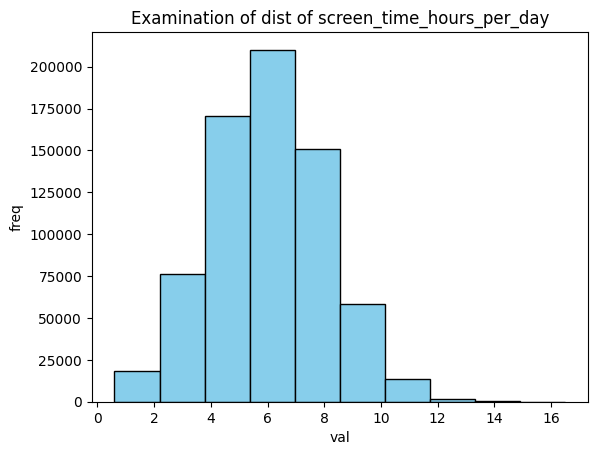

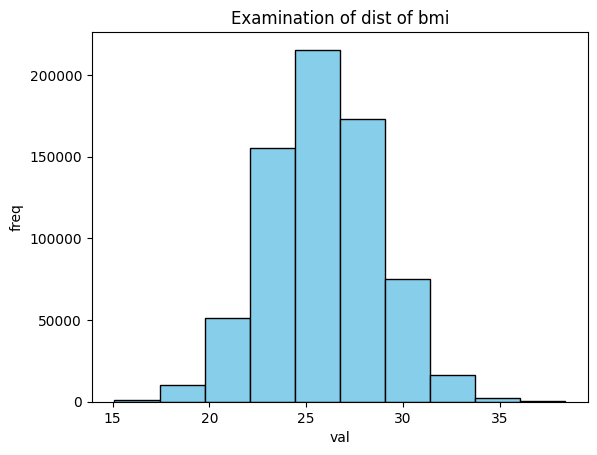

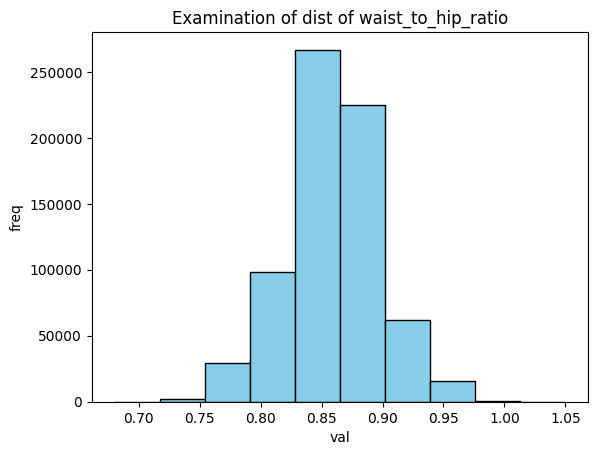

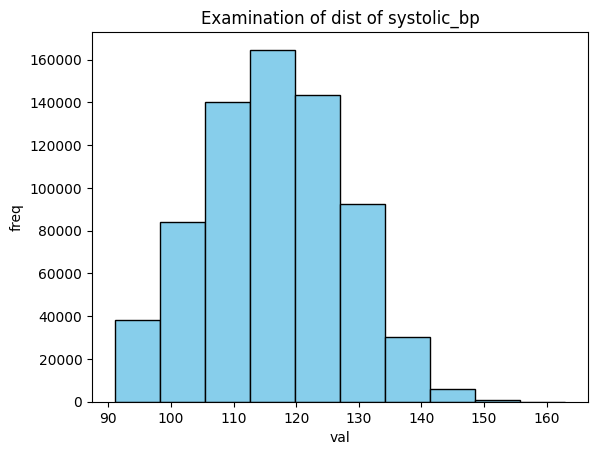

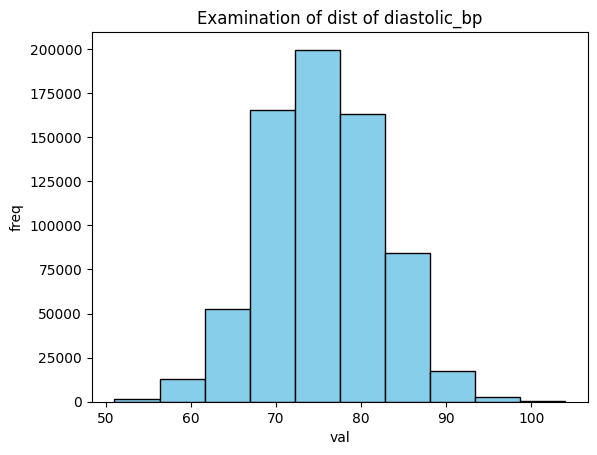

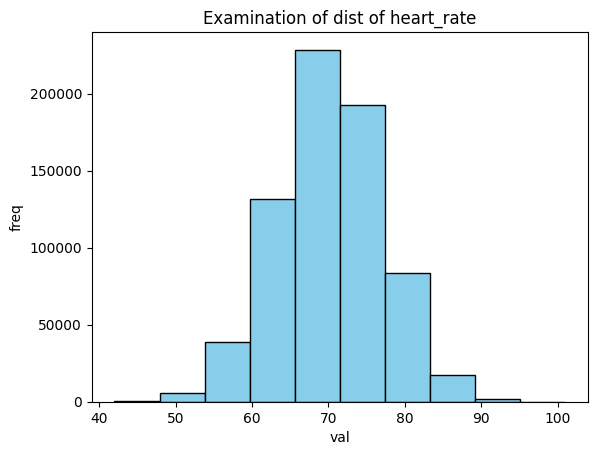

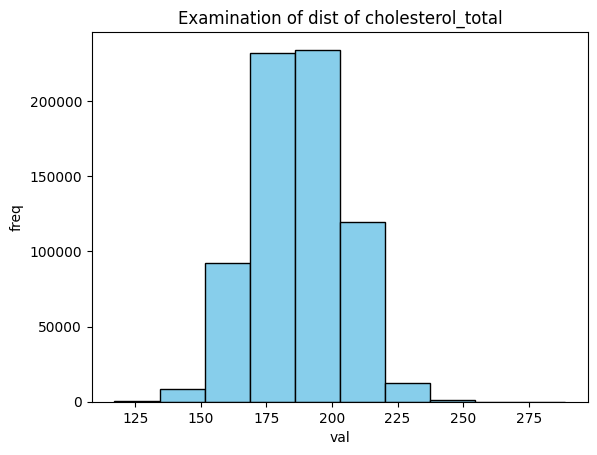

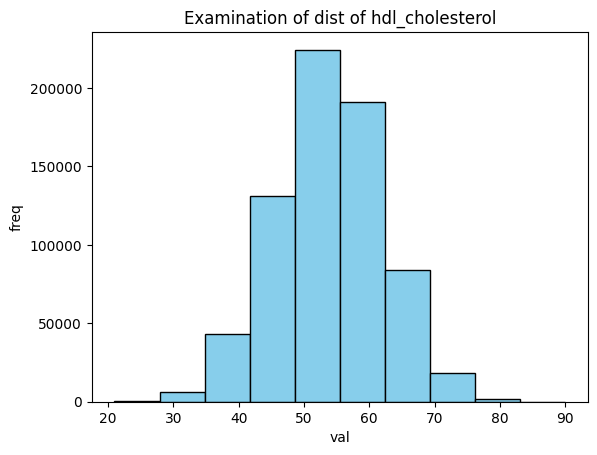

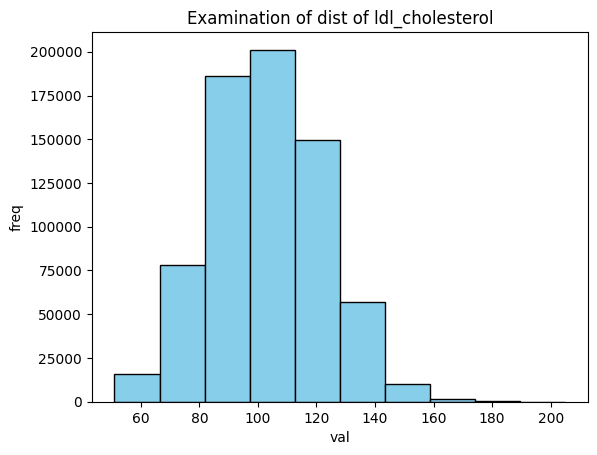

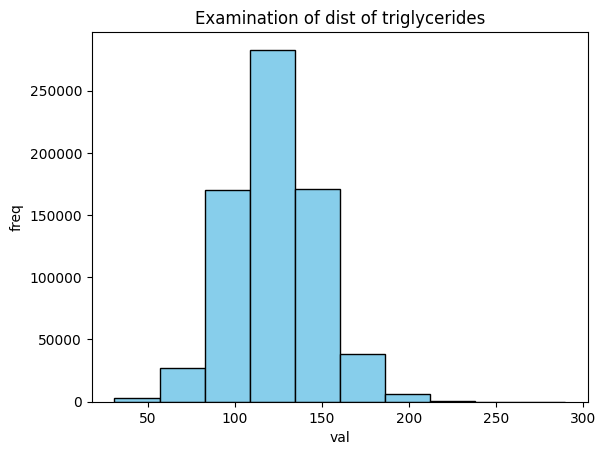

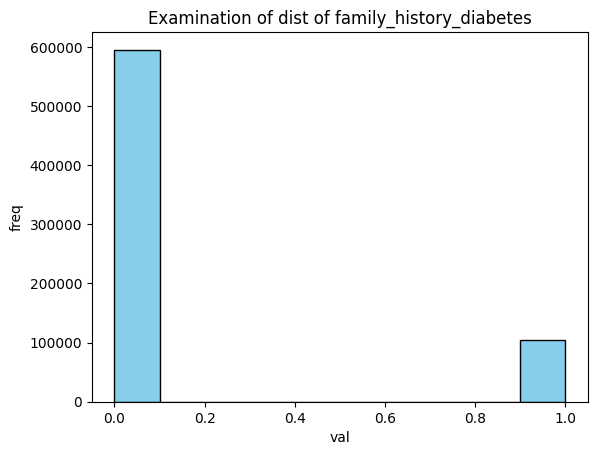

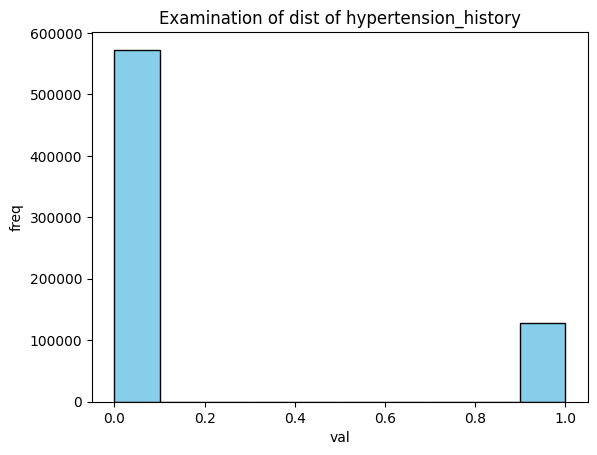

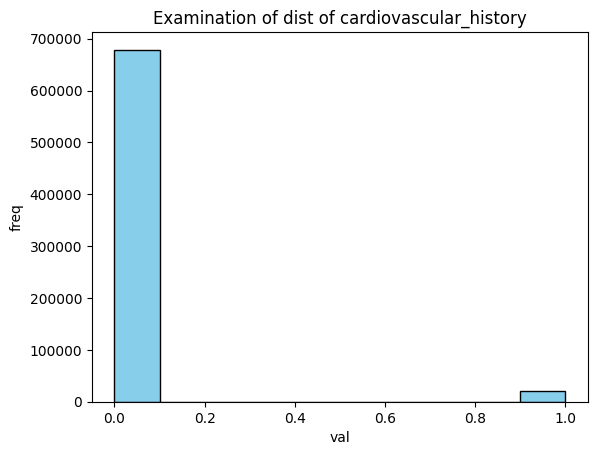

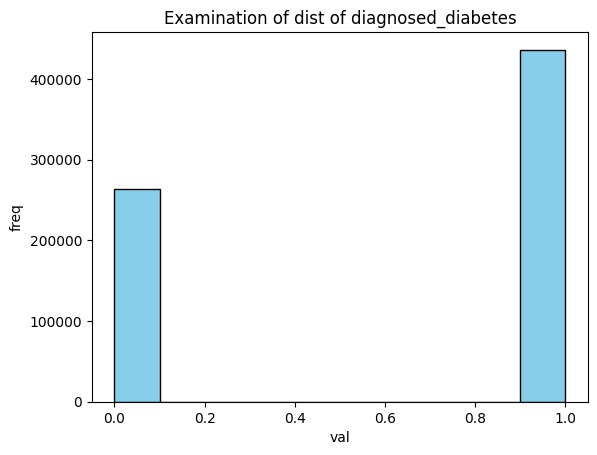

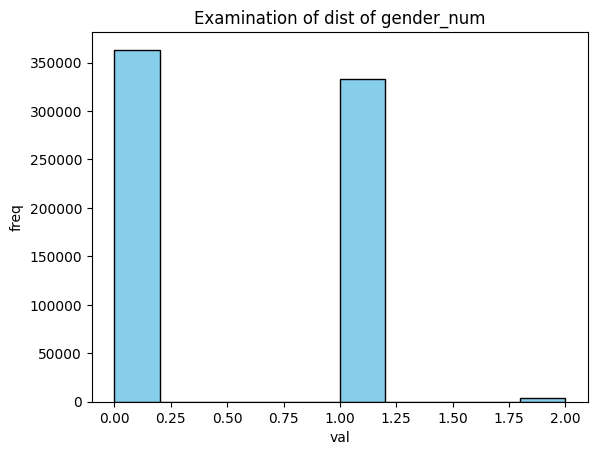

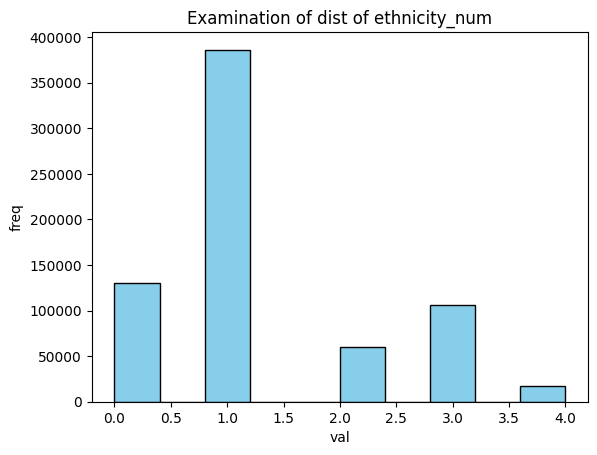

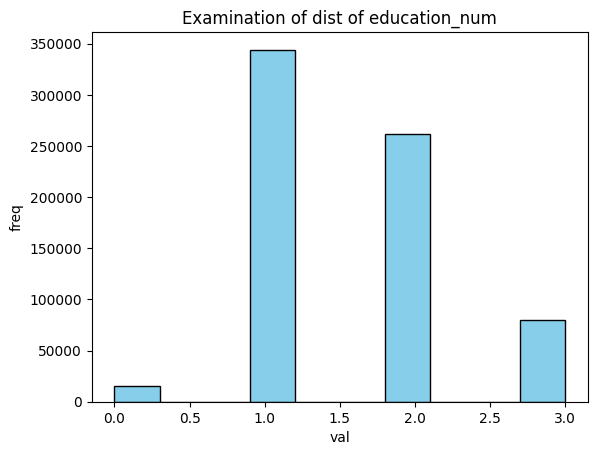

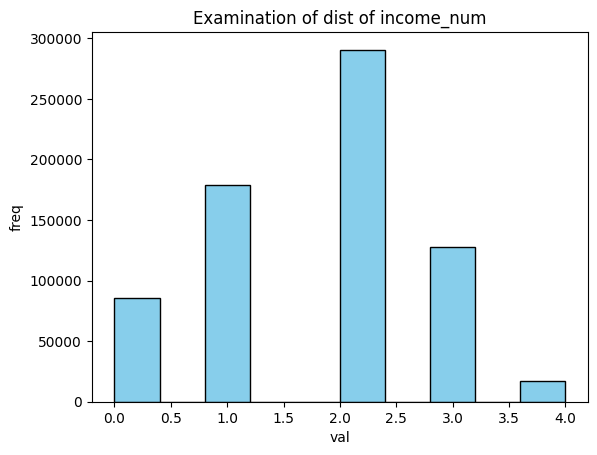

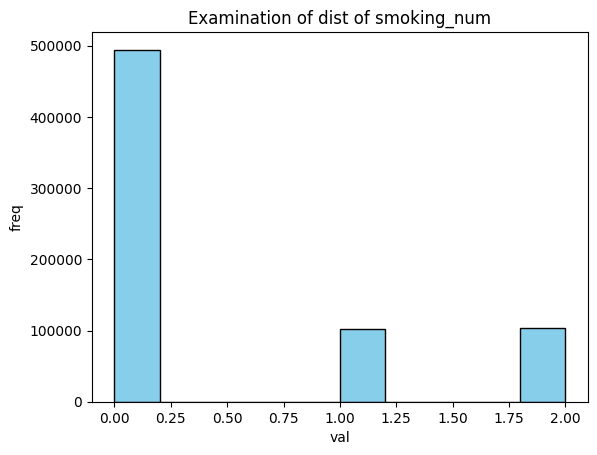

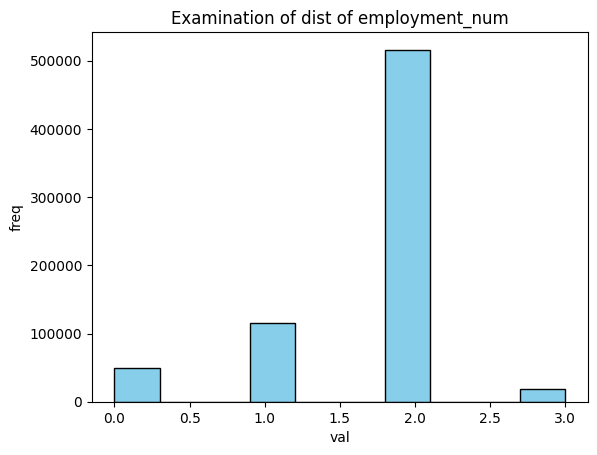

In [7]:
# plot the data
#TODO: Note for now lazy ordinal for all, see if one hot or alternative helps
#TODO: consider transforming some with log norm to make normally distributed ie alc cons

# plot distribution of each column as a histo where title is col name
def plot_dist_col(df, colname):
    plt.hist(df[colname], bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Examination of dist of {colname}")
    plt.xlabel("val")
    plt.ylabel("freq")
    plt.show()



for col in train_df.columns:
    plot_dist_col(train_df, col)


# Step 4 Dataset Creation

In [8]:
X = train_df.drop(['id', 'diagnosed_diabetes'], axis=1) # everything but id col and diagnosed_diabetes
y = train_df['diagnosed_diabetes'] # only diagnosed_diabetes col


X_train, X_val, y_train, y_val = train_test_split(
X,
y,
test_size=0.2,
shuffle=True,
stratify=y,
random_state=42
)

# Step 5 Basic Training

In [27]:
neg = sum(y_train == 0)
pos = sum(y_train == 1)
weight = neg / pos
basic_xgb = XGBClassifier(objective='binary:logistic', 
                          scale_pos_weight=weight,
                          max_depth=7,
                          learning_rate=0.7,
                          min_child_weight=0.25,
                          random_state=42)

basic_xgb.fit(X_train, y_train)

y_pred = basic_xgb.predict(X_val)



In [28]:

# get metrics 
#   accuracy_score, 
#   precision_score, 
#   recall_score, 
#   f1_score, 
#   roc_auc_score, 
#   confusion_matrix

acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc = roc_auc_score(y_val, y_pred)
conf = confusion_matrix(y_val, y_pred)

print(f"Acc: {acc}")
print(f"Prec: {prec}")
print(f"Rec: {rec}")
print(f"F1: {f1}")
print(f"ROC: {roc}")
print(f"Conf mat:\n{conf}")


#TODO: REMOVE DUMB TRAIN METRICS HERE
print("DUMB TRAINING METRICS TO SEE IF FITTING AT ALL \n===============\n")
train_pred = basic_xgb.predict(X_train)


acc = accuracy_score(y_train, train_pred)
prec = precision_score(y_train, train_pred)
rec = recall_score(y_train, train_pred)
f1 = f1_score(y_train, train_pred)
roc = roc_auc_score(y_train, train_pred)
conf = confusion_matrix(y_train, train_pred)

print(f"Acc: {acc}")
print(f"Prec: {prec}")
print(f"Rec: {rec}")
print(f"F1: {f1}")
print(f"ROC: {roc}")
print(f"Conf mat:\n{conf}")



Acc: 0.6468
Prec: 0.7572417921819938
Rec: 0.6377992459403399
F1: 0.6924072207915003
ROC: 0.6497458657885775
Conf mat:
[[34897 17842]
 [31606 55655]]
DUMB TRAINING METRICS TO SEE IF FITTING AT ALL 

Acc: 0.7035482142857142
Prec: 0.8117503585334365
Rec: 0.6827037124046688
F1: 0.7416554233329131
ROC: 0.7103706944324698
Conf mat:
[[155692  55262]
 [110751 238295]]


# Step 5.5 Basic Metrics
- Classwise accuracy
- AUC 
- F1

# Step 6 Basic Improvements

- convert unecessary ordinal 
- log normalization of data